### sklearn.cluster.KMeans
#### 개체의 특성을 대표하는 몇 개의 변수를 기준으로 몇 개의 군집으로 세분화하는 방법
- 개체 간 유사성은 개체 간 거리(행렬을 이용하는데, 대표적으로 유클리디안 거리)를 사용하여 상대적으로 가까운 개체를 동일 군집으로 분류
- 유클리디안 거리 : np.sqrt((X1-X2)^2+(Y1-Y2)^2)

#### 주요 Hyperparameter
- n_cluster : 군집의 수로, 분석자의 경험과 주관으로 결정하거나 통계적 기준에 따라 최적 군집수를 결정

##### KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')

# 분석 코드

In [1]:
# 라이브러리 및 데이터 로드
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap=matplotlib.cm.get_cmap('plasma')
from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('../input/big-data-certification-study/Mall_Customers.csv', encoding='utf-8')
df.head()

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# 데이터셋 분리
X = df.iloc[:,[3,4]]
print(df.shape, X.shape,'\n\n')
X.head()

(200, 5) (200, 2) 




,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 통계적 군집수 확인
- KMeans.inertia_ : 군집의 중심과 각 개체(케이스) 간 거리를 계산
- 중심과 개체 간 거리가 작을수록 잘 형성된 군집이지만 크게 감소하다가 변화가 없는 지점으로 군집수 결정
- 꺾은 선 도표 확인

In [3]:
# 거리 계산
dist=[]

for i in range(1,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_transform(X)
    dist.append(kmeans.inertia_)

dist

[269981.2800000001,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25018.576334776328,
 21818.11458845217,
 19721.54752731274,
 17549.699291912577,
 15926.627039985113,
 14359.24434932742,
 13312.748102207388,
 11910.28028024607,
 10797.189381932407,
 9962.800457875457,
 9277.832127594624,
 8934.607359307354,
 8385.220180309887]

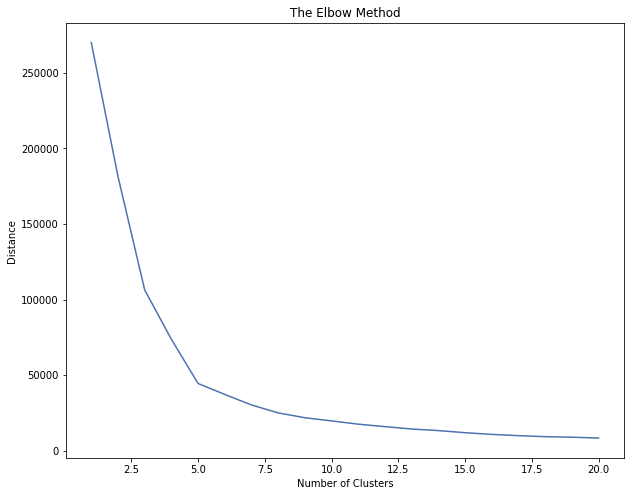

In [4]:
# 그래프 확인(꺾은 선) : 엘보우 기법
plt.figure(figsize=(10,8))
plt.plot(range(1,21),dist)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.show();

# K=5 까지 급격한 감소 후
# 그 이후부터 변화가 거의 없으므로 K=5로 결정

In [5]:
# 학습 및 예측(분류)
k=5
kmeans=KMeans(n_clusters=k)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [6]:
# 군집 분류 병합
group=pd.DataFrame(y_kmeans)
group.columns=['Group']
data=pd.concat([df,group],axis=1)
data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [7]:
# 중심죄표를 통해 군집의 특성 파악 및 해석
kmeans_pred=KMeans(n_clusters=k,
                   random_state=42).fit(X)
# 학습만 진행한 다음 중심좌표 확인 : cluster_centers_
kmeans_pred.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [8]:
# 새로운 데이터 예측
kmeans_pred.predict([[100,50],[30,80]])
# 각각 군집 4와 군집 3으로 분류

array([4, 3], dtype=int32)

In [9]:
cls=[('Cluster '+str(i+1)) for i in range(k)]
cls

['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

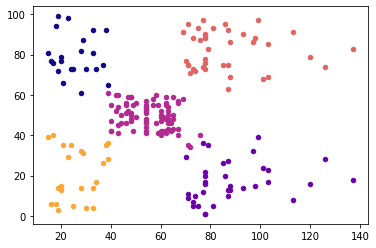

In [10]:
# 산점도
a_X=np.array(X)
plt.figure()
for i in range(k):
    plt.scatter(a_X[y_kmeans==i,0],
                a_X[y_kmeans==i,1],
                s=20, c=cmap(i/k),
                label=cls[i]);

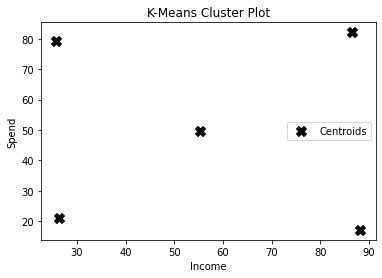

In [11]:
# 군집의 중심좌표
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=100,c='black',
            label='Centroids',marker='X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('K-Means Cluster Plot')
plt.legend()
plt.show();

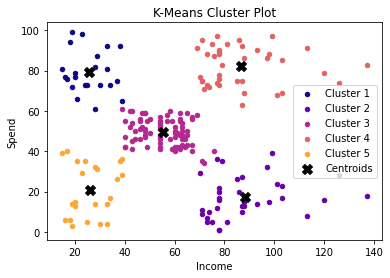

In [12]:
plt.figure()
for i in range(k):
    plt.scatter(a_X[y_kmeans==i,0],
                a_X[y_kmeans==i,1],
                s=20, c=cmap(i/k),
                label=cls[i]);
    
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=100,c='black',
            label='Centroids',marker='X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('K-Means Cluster Plot')
plt.legend()
plt.show();

### 군집분석 계산

In [13]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
iris=pd.read_csv('../input/big-data-certification-study/iris.csv', encoding='utf-8')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# 군집분석은 레이블이 없어야 가능
x_iris=iris.drop(columns=['class'])
y_iris=iris['class']
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# 변수별 단위가 다르기 때문에 거리계산이 정확하지 않으므로
# 데이터 정규화 필요
x_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scale=scale.fit_transform(x_iris)
pd.DataFrame(x_scale).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [17]:
# 군집수 학습결과 및 중심좌표
K=range(1,10)
km=[KMeans(n_clusters=k).fit(x_scale) for k in K]
cen=[k.cluster_centers_ for k in km]

In [18]:
# 유클리디안 거리 계산
d_k=[cdist(x_iris, cents,'euclidean') for cents in cen]

In [19]:
cIdx=[np.argmin(D,axis=1) for D in d_k]
dist=[np.min(D, axis=1) for D in d_k]
avgWithinSS=[sum(d)/x_scale.shape[0] for d in dist]
# avgWithinSS : 군집의 중심과 각 개체간 최소 거리의 평균

In [20]:
wcss=[sum(d**2) for d in dist]
# wcss : 군집 내 각 개체간 거리의 제곱합
tss=sum(pdist(x_scale)**2)/x_scale.shape[0]
# tss : 전체 개체간 거리의 제곱합을 개체수로 나눈 값
bss=tss-wcss
bss

array([-8936.2       , -7659.55373108, -5866.21358604, -5866.21358604,
       -5244.2583964 , -4379.39946164, -4379.39946164, -3248.04689512,
       -3248.04689512])

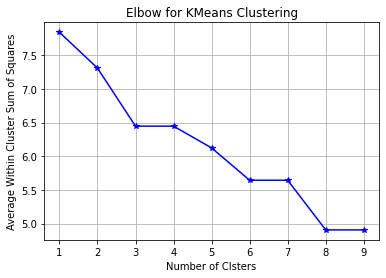

In [21]:
# Elbow Curve - Average Within Cluster Sum of Squares
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of Clsters')
plt.ylabel('Average Within Cluster Sum of Squares')
plt.title('Elbow for KMeans Clustering');

# 군집수는 4 또는 6이 적절

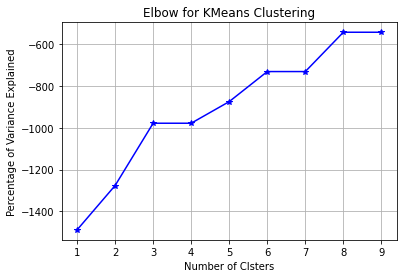

In [22]:
# Elbow Curve - Percentage of Variance Explained
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of Clsters')
plt.ylabel('Percentage of Variance Explained')
plt.title('Elbow for KMeans Clustering');

In [23]:
# Calculation of Eigen-Vectors & Eigen-Values
w, v=np.linalg.eig(np.array([[0.91335,0.75969],[0.75969,0.69702]]))
print('\nEigen-Values\n',w)
print('\nEigen-Vectors\n',v)

# 고유값 계산 시 특정데이터의 군집에서의 위치를 파악 가능


Eigen-Values
 [1.57253666 0.03783334]

Eigen-Vectors
 [[ 0.75530088 -0.6553782 ]
 [ 0.6553782   0.75530088]]


In [24]:
# 군집수 4로 결정
k_fit=KMeans(n_clusters=4,max_iter=300)
k_fit.fit(x_scale)

KMeans(n_clusters=4)

In [25]:
k_fit.cluster_centers_
# 세 번째 군집이 꽃 받침의 길이 및 너비가 가장 큰 꽃의 군집

array([[-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [-1.28213558,  0.22643209, -1.30968035, -1.29836862],
       [-0.70049078,  1.56529014, -1.29924123, -1.20436862],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256]])

In [26]:
# 세 종류의 꽃과 나누어진 네 개의 군집간 일치 정도를 교차표로 확인
print('\nK-Means Clustering - Confusion Matrix\n\n',
pd.crosstab(y_iris,k_fit.labels_,
                rownames=['Actuall'],
                colnames=['Predicted']))


K-Means Clustering - Confusion Matrix

 Predicted         0   1   2   3
Actuall                        
Iris-setosa       0  27  23   0
Iris-versicolor  39   0   0  11
Iris-virginica   17   0   0  33


### Silhouette Score

In [27]:
print('Silhouette Score: %0.3f' %
      silhouette_score(x_iris,
                       k_fit.labels_,
                       metric='euclidean'))

Silhouette Score: 0.350


In [28]:
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,max_iter=300)
    kmeans.fit(x_iris)
    print('For K Value',k,'Silhouette Score : %0.3f' %
          silhouette_score(x_iris,kmeans.labels_,
                           metric='euclidean'))

For K Value 2 Silhouette Score : 0.681
For K Value 3 Silhouette Score : 0.553
For K Value 4 Silhouette Score : 0.498
For K Value 5 Silhouette Score : 0.489
For K Value 6 Silhouette Score : 0.367
For K Value 7 Silhouette Score : 0.360
For K Value 8 Silhouette Score : 0.339
For K Value 9 Silhouette Score : 0.352
For K Value 10 Silhouette Score : 0.319
